In [325]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix

Data source: "2024 Olympics: Medals vs GDP", https://www.kaggle.com/datasets/ernestitus/2024-olympics-medals-vs-gdp

In [326]:
# Imports dataset
df_olympics = pd.read_csv('/Users/jahansilverman/Documents/CSVs for Data Science Projects/olympics.csv', header=0)

In [327]:
df_olympics.head()

,country,country_code,region,gold,silver,bronze,total,gdp,gdp_year,population
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


In [328]:
df_olympics.dtypes

country          object
country_code     object
region           object
gold              int64
silver            int64
bronze            int64
total             int64
gdp             float64
gdp_year          int64
population      float64
dtype: object

In [329]:
# Improves column names
df_olympics.rename(columns={'gdp': 'gdp_per_capita_usd', 'population': 'population_millions'}, inplace=True)

In [330]:
df_olympics.head()

,country,country_code,region,gold,silver,bronze,total,gdp_per_capita_usd,gdp_year,population_millions
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2


In [331]:
df_olympics.describe()

,gold,silver,bronze,total,gdp_per_capita_usd,gdp_year,population_millions
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000
mean,3.644444,3.633333,4.255556,11.533333,24478.053556,2022.977778,69.027778
std,7.018933,6.797967,6.586607,19.782071,25547.857382,0.148231,213.286437
min,0.000000,0.000000,0.000000,1.000000,1014.210000,2022.000000,0.100000
25%,0.000000,0.000000,1.000000,2.000000,5815.180000,2023.000000,5.325000
50%,1.000000,1.000000,2.000000,5.000000,13061.185000,2023.000000,12.150000
75%,3.000000,3.000000,5.000000,9.000000,34484.677500,2023.000000,48.550000
max,40.000000,44.000000,42.000000,126.000000,103684.880000,2023.000000,1428.600000


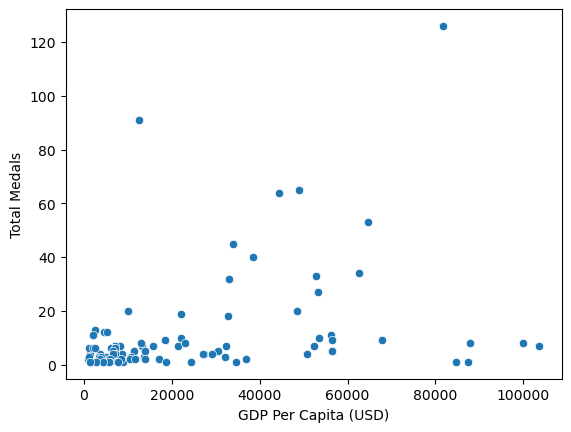

In [332]:
# GDP Per Capita (USD) vs. Total Medals Won
sns.scatterplot(data=df_olympics, x='gdp_per_capita_usd', y='total')
plt.xlabel('GDP Per Capita (USD)')
plt.ylabel('Total Medals')
plt.show()

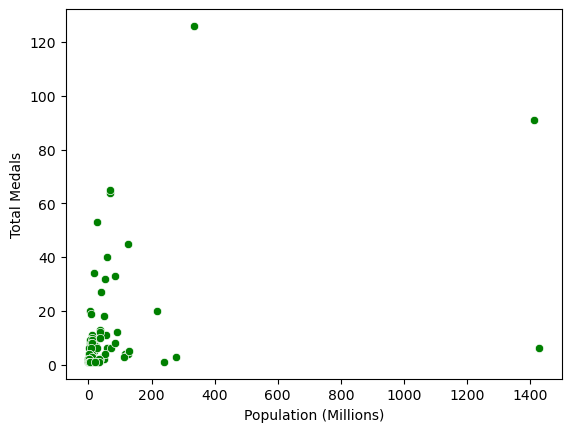

In [333]:
# Population (Millions) vs. Total Medals Won
sns.scatterplot(data=df_olympics, x='population_millions', y='total', color='Green')
plt.xlabel('Population (Millions)')
plt.ylabel('Total Medals')
plt.show()

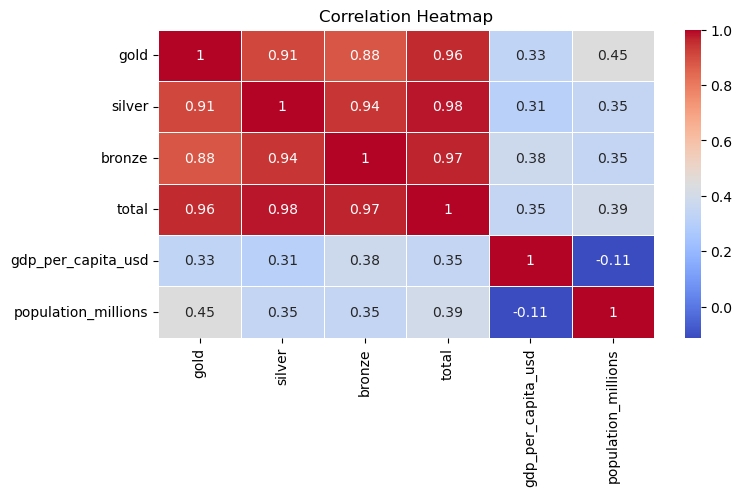

In [334]:
# Correlation heatmap of # of Each Medal, # of Total Medals, GDP Per Capita (USD), and Population (Millions)
plt.figure(figsize=(8, 4))
corr = df_olympics[['gold', 'silver', 'bronze', 'total', 'gdp_per_capita_usd', 'population_millions']].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

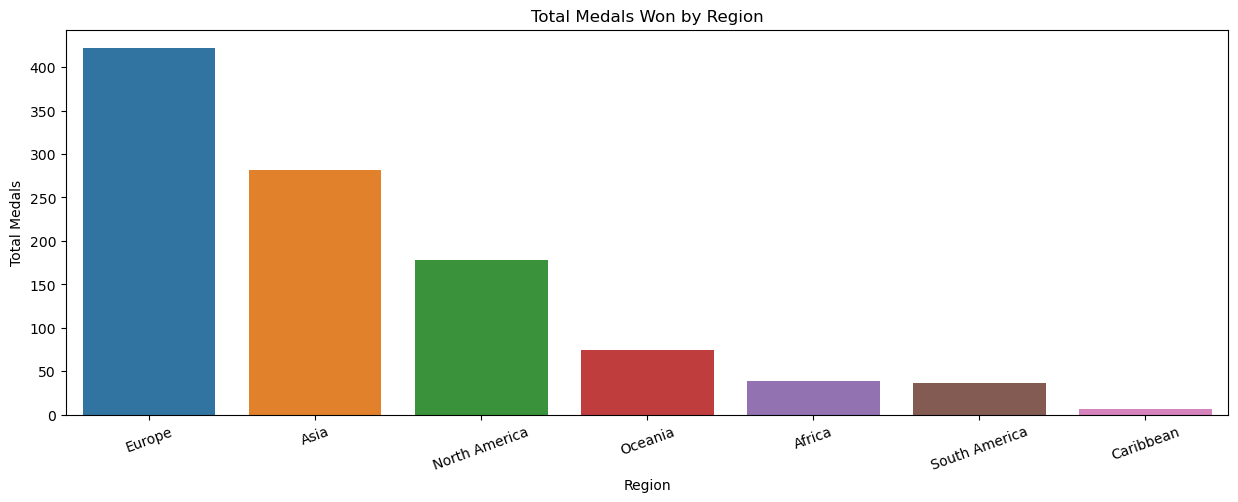

In [335]:
# Total Medals Won by Region
df_olympics_bar = df_olympics.groupby('region').agg({'total':sum}).reset_index().sort_values(by='total',
                                                                                             ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title('Total Medals Won by Region')
sns.barplot(x='region',y='total',data=df_olympics_bar)
plt.xlabel('Region')
plt.ylabel('Total Medals')
plt.show()

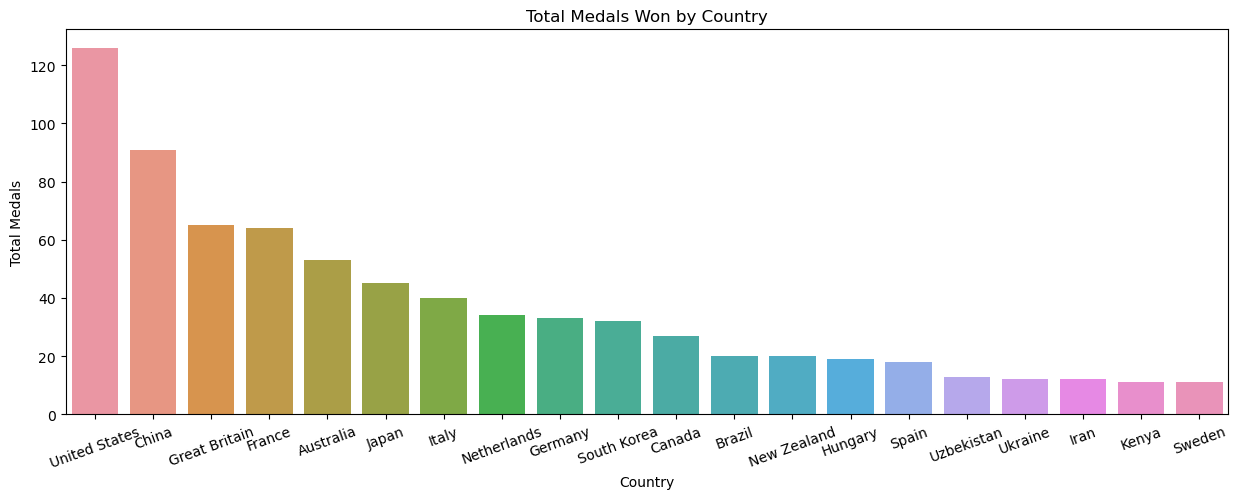

In [336]:
# Total Medals Won by Country
df_olympics_bar = df_olympics.groupby('country').agg({'total':sum}).reset_index().sort_values(by='total',
                                                                                              ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title('Total Medals Won by Country')
sns.barplot(x='country',y='total',data=df_olympics_bar.head(20))
plt.xlabel('Country')
plt.ylabel('Total Medals')
plt.show()

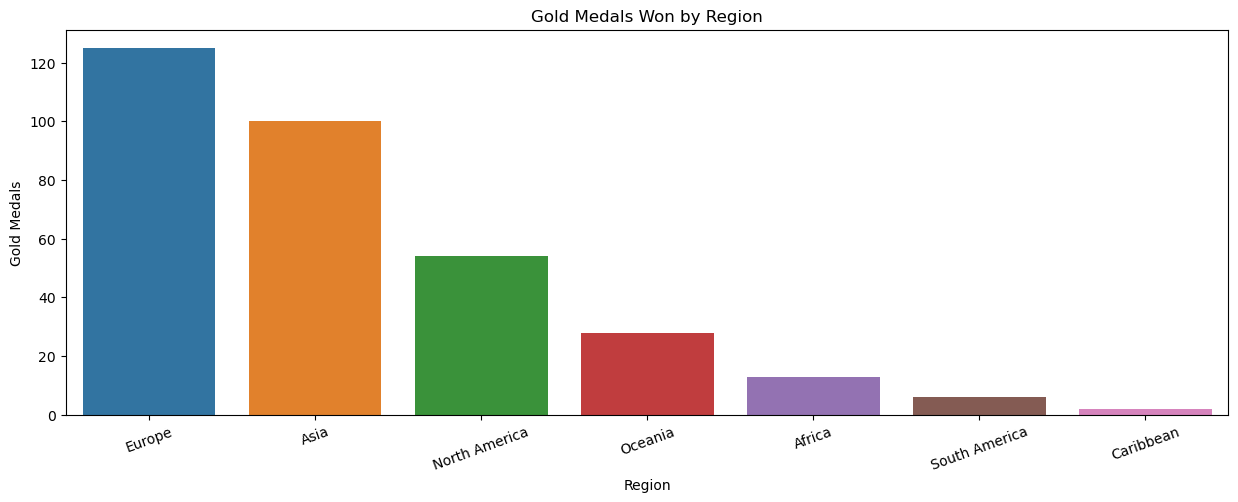

In [337]:
# Gold Medals Won by Region
df_olympics_bar = df_olympics.groupby('region').agg({'gold':sum}).reset_index().sort_values(by='gold',
                                                                                            ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title('Gold Medals Won by Region')
sns.barplot(x='region',y='gold',data=df_olympics_bar)
plt.xlabel('Region')
plt.ylabel('Gold Medals')
plt.show()

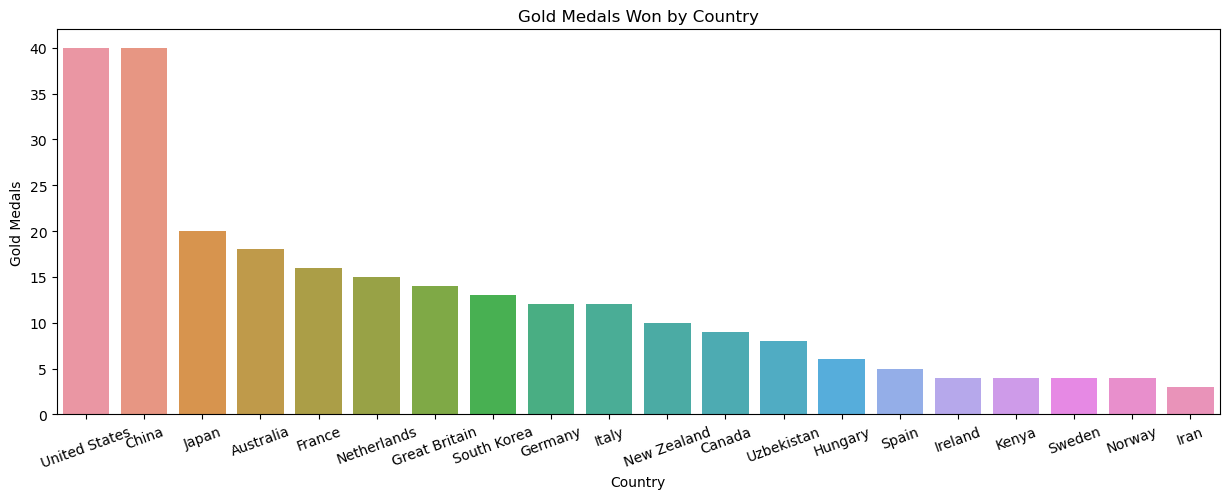

In [338]:
# Gold Medals Won by Country
df_olympics_bar = df_olympics.groupby('country').agg({'gold':sum}).reset_index().sort_values(by='gold',
                                                                                             ascending=False)
plt.figure(figsize=(15,5))
plt.xticks(rotation=20)
plt.title('Gold Medals Won by Country')
sns.barplot(x='country',y='gold',data=df_olympics_bar.head(20))
plt.xlabel('Country')
plt.ylabel('Gold Medals')
plt.show()

In [339]:
# Creates dummy variable columns for 'won_gold_ind', 'won_silver_ind', and 'won_bronze_ind' to indicate whether
# a country won at least one of that medal
df_olympics['won_gold_ind'] = np.where(df_olympics['gold'] >= 1, 1, 0)
df_olympics['won_silver_ind'] = np.where(df_olympics['silver'] >= 1, 1, 0)
df_olympics['won_bronze_ind'] = np.where(df_olympics['bronze'] >= 1, 1, 0)

In [340]:
df_olympics.head(20)

,country,country_code,region,gold,silver,bronze,total,gdp_per_capita_usd,gdp_year,population_millions,won_gold_ind,won_silver_ind,won_bronze_ind
0,United States,USA,North America,40,44,42,126,81695.19,2023,334.9,1,1,1
1,China,CHN,Asia,40,27,24,91,12614.06,2023,1410.7,1,1,1
2,Japan,JPN,Asia,20,12,13,45,33834.39,2023,124.5,1,1,1
3,Australia,AUS,Oceania,18,19,16,53,64711.77,2023,26.6,1,1,1
4,France,FRA,Europe,16,26,22,64,44460.82,2023,68.2,1,1,1
5,Netherlands,NLD,Europe,15,7,12,34,62536.73,2023,17.9,1,1,1
6,Great Britain,GBR,Europe,14,22,29,65,48866.60,2023,68.3,1,1,1
7,South Korea,KOR,Asia,13,9,10,32,33121.37,2023,51.7,1,1,1
8,Italy,ITA,Europe,12,13,15,40,38373.17,2023,58.8,1,1,1
9,Germany,DEU,Europe,12,13,8,33,52745.76,2023,84.5,1,1,1


Linear Regression

In [341]:
# Creates column for the natural log of total medals won, to be used in linear regression predicting a country's
# total medals
df_olympics['ln_total'] = np.log(df_olympics['total'])

In [342]:
# Creates x and y variables for linear regression
x = df_olympics[['won_gold_ind', 'won_silver_ind', 'won_bronze_ind', 'gdp_per_capita_usd', 'population_millions']]
y = df_olympics['ln_total']

In [343]:
# Splits dataset into training portion and testing portion
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [344]:
# Builds linear regression model
regressor = LinearRegression()
regressor.fit(x_train, y_train)

LinearRegression()

In [345]:
# Coefficients table
coeff_df_olympics = pd.DataFrame(regressor.coef_, x.columns, columns=['Coefficient'])
coeff_df_olympics

,Coefficient
won_gold_ind,0.970416
won_silver_ind,1.116876
won_bronze_ind,1.288553
gdp_per_capita_usd,0.000010
population_millions,0.001220


In [346]:
# Makes predictions
y_pred = regressor.predict(x_test)

In [347]:
# Compares actual output values to predicted values
df_actual_vs_predicted = pd.DataFrame({'Actual ln(Total Medals Won)': y_test, 
                                       'Predicted ln(Total Medals Won)': y_pred})
print(df_actual_vs_predicted.to_string(index=False))

 Actual ln(Total Medals Won)  Predicted ln(Total Medals Won)
                    3.806662                        2.584563
                    2.944439                        2.330284
                    1.098612                        2.155596
                    2.302585                        2.363005
                    1.386294                        1.263602
                    1.945910                        2.316619
                    1.791759                        2.259924
                    1.791759                        2.172852
                    1.098612                        0.038949
                    0.000000                        0.053516
                    3.465736                        2.488798
                    1.609438                        2.221299
                    1.098612                        1.130389
                    2.079442                        1.362748
                    3.688879                        2.548742
                    2.39

Evaluates linear regression model

In [348]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.5383276150557901
Mean Squared Error: 0.44448468073544106
Root Mean Squared Error: 0.6666968432019467


In [349]:
r_squared = regressor.score(x_test, y_test)
print('Coefficient of Determination:', r_squared)

Coefficient of Determination: 0.5617211146889953


Logistic Regression

In [350]:
# Creates x and y variables for logistic regression predicting whether a country will win at least one gold medal
x = df_olympics[['silver', 'bronze', 'won_silver_ind', 'won_bronze_ind', 'gdp_per_capita_usd', 
                 'population_millions']]
y = df_olympics['won_gold_ind']

In [351]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [352]:
# Builds logistic regression model
model = LogisticRegression()
model.fit(x_train, y_train)

LogisticRegression()

In [353]:
# Adds a constant to the independent variables for statsmodels
x_train_with_constant = sm.add_constant(x_train)

In [354]:
# Fits logistic regression model using statsmodels
model_sm = sm.Logit(y_train, x_train_with_constant).fit(cov_type='HC0')

Optimization terminated successfully.
         Current function value: 0.512997
         Iterations 9


In [355]:
# Summary table
print(model_sm.summary())

                           Logit Regression Results                           
Dep. Variable:           won_gold_ind   No. Observations:                   72
Model:                          Logit   Df Residuals:                       65
Method:                           MLE   Df Model:                            6
Date:                Wed, 29 Jan 2025   Pseudo R-squ.:                  0.1811
Time:                        12:20:46   Log-Likelihood:                -36.936
converged:                       True   LL-Null:                       -45.104
Covariance Type:                  HC0   LLR p-value:                   0.01205
                          coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                   0.3733      0.803      0.465      0.642      -1.200       1.947
silver                  0.6391      0.293      2.184      0.029       0.066       1.213
bronze          

In [356]:
# Makes predictions
y_pred = model.predict(x_test)

Evaluates logistic regression model

In [357]:
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy.round(3))

Accuracy: 0.778


In [358]:
f1_score = f1_score(y_test, y_pred, average='weighted', labels=np.unique(y_pred))
print('F1 Score:', f1_score.round(3))

F1 Score: 0.875


In [359]:
conf_matrix = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:\n', conf_matrix)

Confusion Matrix:
 [[ 0  4]
 [ 0 14]]
